In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [0]:
# read csv
data = pd.read_csv("data.csv", header = 0)

# define variables
Y = data['price_x1000_sh']
X = data['size_in_sq_ft']

In [0]:
def mse(N, Y, Y_hat):
  return (1/N) * sum(Y - Y_hat) ** 2

In [0]:
def grad_descent_fit(X, Y, L = 0.0001):
  # define y-intercept, slope, learning rate, epochs
  m = 0
  c = 0
  epoch = 100
  N = float(len(X))
  epoch_count_list = []
  epoch_error_list = []
  for i in range(epoch):
    # predicted value
    Y_hat = m * X + c
    epoch_count_list.append(i)
    epoch_error = mse(N, Y, Y_hat)
    epoch_error_list.append(epoch_error)
    # derivative wrt to m
    D_m = (-2/N) * sum(X * (Y - Y_hat))
    # derivative wrt to c
    D_c = (-2/N) * sum(Y - Y_hat)

    # new m and c
    m = m - L * D_m
    c = c - L * D_c
  print("Final m: ", m, "and final c is: ", c)
  return Y_hat

In [0]:
def lasso_fit(X, Y, lamda = 1.5, L = 0.0001):
  w = 1
  b = 0
  N = float(len(X))
  for i in range(100):
    # predicted value
    Y_hat = w * X + b
    # derivative wrt to w
    D_w = (-2/N) * sum(X * (Y - Y_hat)) - lamda * (w/abs(w))
    # derivative wrt to b
    D_b = (-2/N) * sum(Y - Y_hat)

    # new w and b
    w = w - (L * D_w)
    b = b - (L * D_b)
  print("Final lasso regression w: ", w, "and b is: ", b)
  return Y_hat

In [0]:
def ridge_fit(X, Y, lamda = 1.5, L = 0.0001):
  w = 1
  b = 0
  N = float(len(X))
  for i in range(100):
    Y_hat = w * X + b
    D_w = (-2/N) * sum(X * (Y - Y_hat)) - (2 * lamda * w)
    D_b = (-2/N) * sum(Y - Y_hat)

    w = w - (L * D_w)
    b = b - (L * D_b)
  print("Final ridge regression w: ", w, "and b is: ", b)
  return Y_hat

Final m:  1.4788027175308887 and final c is:  0.03507497059521459
Final lasso regression w:  1.4794952303588504 and b is:  0.01515400542226122
Final ridge regression w:  1.4800962063369065 and b is:  0.014593778825164806


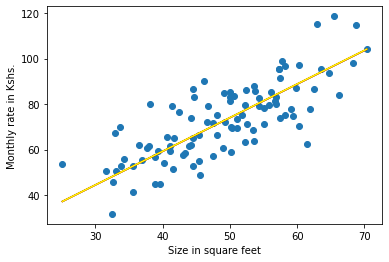

In [7]:
GD_Y_hat = grad_descent_fit(X, Y)
Lasso_Y_hat = lasso_fit(X, Y)
Ridge_Y_hat = ridge_fit(X, Y)

# do the plot
plt.scatter(X, Y)
plt.ylabel("Monthly rate in Kshs.")
plt.xlabel("Size in square feet")

plt.plot([min(X), max(X)], [min(GD_Y_hat), max(GD_Y_hat)], color = 'black')
plt.plot([min(X), max(X)], [min(Lasso_Y_hat), max(Lasso_Y_hat)], color = 'red')
plt.plot([min(X), max(X)], [min(Ridge_Y_hat), max(Ridge_Y_hat)], color = 'yellow')